# Pandas DataFrame Tutorial with Titanic Dataset
This notebook demonstrates the core functionality of pandas using the Titanic dataset.

# 1. What is Pandas

**Pandas** is an open-source data analysis and manipulation library for Python.

- Built on top of **NumPy**
- Designed for **structured data** (e.g., CSV, Excel, SQL databases)
- Enables **data cleaning, transformation, exploration, and visualization**


# 2. Key Features of Pandas

Pandas offers a rich set of tools and capabilities:

- **Labeled axes**: rows and columns are labeled for easy indexing
- **Powerful groupby**: aggregate data flexibly
- **Easy data I/O**: load/save data using `.read_csv()`, `.to_excel()` etc.
- **Integrated with visualization**: works with Matplotlib and Seaborn

In [128]:
import pandas as pd

# Load Titanic dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Labeled axes example
print("Column labels:", df.columns.tolist())
print("First row:\n", df.iloc[0])

# Group by class and calculate survival rate
print("\nSurvival rate by class:")
print(df.groupby('Pclass')['Survived'].mean())

# Save a subset to new CSV (I/O example)
df[['Name', 'Age', 'Fare']].to_csv('titanic_subset.csv', index=False)

Column labels: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
First row:
 PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

Survival rate by class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


# 3. Data Structures in Pandas

Pandas has two main data structures:

- **Series**: One-dimensional labeled array (like a column)
- **DataFrame**: Two-dimensional labeled table (like a spreadsheet)

### Comparison
| Feature        | Series                      | DataFrame                       |
|----------------|-----------------------------|----------------------------------|
| Dimensions     | 1D                          | 2D                              |
| Index          | Yes                         | Yes (row + column labels)       |
| Use case       | Single column or list       | Full table of data              |

In [129]:
# Load the Titanic dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Series example: extract the "Name" column
name_series = df['Name']
print("Series Example:\n")
print(name_series.head())

# DataFrame example: extract "Name" and "Age" columns
name_age_df = df[['Name', 'Age']]
print("\nDataFrame Example:\n")
print(name_age_df.head())

Series Example:

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

DataFrame Example:

                                                Name   Age
0                            Braund, Mr. Owen Harris  22.0
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0
2                             Heikkinen, Miss. Laina  26.0
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0
4                           Allen, Mr. William Henry  35.0


# 4. Basic Data Operations

Pandas provides several functions to quickly explore and understand your data:

- `df.head()` – View the first few rows
- `df.tail()` – View the last few rows
- `df.info()` – Overview of column types, non-null values
- `df.describe()` – Statistical summary for numeric columns
- `df['col']`, `df[['col1', 'col2']]` – Access specific columns
- `df.dtypes` – Display column data types

In [155]:
df = pd.read_csv("Titanic-Dataset.csv")

# View top and bottom rows
print("=== Head (first 5 rows) ===")
print(df.head())

print("\n=== Tail (last 5 rows) ===")
print(df.tail())

# Info and summary
print("\n=== DataFrame Info ===")
df.info()

print("\n=== Statistical Summary ===")
print(df.describe())

# Accessing columns
print("\n=== Age Column (Series) ===")
print(df['Age'].head())

print("\n=== Name and Fare Columns (DataFrame) ===")
print(df[['Name', 'Fare']].head())

# Data types
print("\n=== Column Data Types ===")
print(df.dtypes)

=== Head (first 5 rows) ===
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450 

# 5. Modifying Data

You can modify data in a DataFrame using the following methods:

- Rename columns: `df.rename()`
- Drop columns: `df.drop()`
- Fill missing values: `df.fillna()`
- Convert column types: `df.astype()`

In [141]:
# Rename a column
df = pd.read_csv("Titanic-Dataset.csv")
df = df.rename(columns={'SibSp': 'Siblings/Spouses', 'Parch': 'Parents/Children'})

# Drop a column
df = df.drop(columns=['Ticket'])

# Fill missing Age values with the median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Convert Age column to integer (for example)
df['Age'] = df['Age'].astype(int)

print(df[['Name', 'Age', 'Siblings/Spouses']].head())


                                                Name  Age  Siblings/Spouses
0                            Braund, Mr. Owen Harris   22                 1
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   38                 1
2                             Heikkinen, Miss. Laina   26                 0
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   35                 1
4                           Allen, Mr. William Henry   35                 0


# 6. Arithmetic and Aggregation

Pandas allows arithmetic operations across columns and supports powerful aggregation methods.

## 1. Column-wise Operations
You can perform arithmetic between columns.  
Example: Add "Siblings/Spouses" and "Parents/Children" to create "FamilySize".

## 2. Aggregations
You can calculate statistics like mean, sum, max, min across columns using `.agg()`.

## 3. Groupby Example
Group data by a specific column (e.g., gender or class) and apply aggregate functions to each group.


In [143]:
# 1. Column-wise: Create "FamilySize"
df['FamilySize'] = df['Siblings/Spouses'] + df['Parents/Children']

print("=== New column: FamilySize (Siblings/Spouses + Parents/Children) ===")
print(df[['Siblings/Spouses', 'Parents/Children', 'FamilySize']].head())

# 2. Aggregations
print("\n=== Aggregation of Age and Fare (mean, sum, max, min) ===")
print(df[['Age', 'Fare']].agg(['mean', 'sum', 'max', 'min']))

# 3. Groupby Example
print("\n=== Survival Rate and Count by Sex ===")
print(df.groupby('Sex')['Survived'].agg(['mean', 'count']))

print("\n=== Fare Statistics by Passenger Class ===")
print(df.groupby('Pclass')['Fare'].agg(['mean', 'max', 'min', 'count']))


=== New column: FamilySize (Siblings/Spouses + Parents/Children) ===
   Siblings/Spouses  Parents/Children  FamilySize
0                 1                 0           1
1                 1                 0           1
2                 0                 0           0
3                 1                 0           1
4                 0                 0           0

=== Aggregation of Age and Fare (mean, sum, max, min) ===
               Age          Fare
mean     29.345679     32.204208
sum   26147.000000  28693.949300
max      80.000000    512.329200
min       0.000000      0.000000

=== Survival Rate and Count by Sex ===
            mean  count
Sex                    
female  0.742038    314
male    0.188908    577

=== Fare Statistics by Passenger Class ===
             mean       max  min  count
Pclass                                 
1       84.154687  512.3292  0.0    216
2       20.662183   73.5000  0.0    184
3       13.675550   69.5500  0.0    491


# 7. IO Tools – Reading and Writing Files

Pandas provides simple and powerful functions to read from and write to external files.

### Reading Files
- `read_csv(path)` – Read CSV files
- `read_excel(path)` – Read Excel files (requires openpyxl or xlrd)
- `read_json(path)` – Read JSON data

### Writing Files
- `to_csv(path)` – Save DataFrame as CSV
- `to_excel(path)` – Save DataFrame as Excel
- `to_json(path)` – Save DataFrame as JSON


In [145]:
# Load Titanic CSV (already done before, repeated here for IO demo)
df = pd.read_csv('Titanic-Dataset.csv')

# Save subset of data to different formats
subset = df[['Name', 'Sex', 'Age', 'Fare']]

# Write to CSV
subset.to_csv('titanic_subset.csv', index=False)

# Write to Excel
subset.to_excel('titanic_subset.xlsx', index=False)

# Write to JSON
subset.to_json('titanic_subset.json', orient='records', lines=True)


# 8. Selecting Data – Basics

Pandas provides several intuitive ways to access and select data from a DataFrame.

## 1. Selecting Columns
- `df['col']` – Select a single column (returns a Series)
- `df[['col1', 'col2']]` – Select multiple columns (returns a DataFrame)

## 2. Selecting Rows
- `df.iloc[0]` – Select row by **position**
- `df.loc[0]` – Select row by **label** (same as index if not set manually)

## 3. Boolean Indexing
- Filter rows that match a condition, e.g. `df[df['Age'] > 60]`


In [156]:
# 1. Select single and multiple columns
print("=== Single column (Name) ===")
print(df['Name'].head())

print("\n=== Multiple columns (Name + Age) ===")
print(df[['Name', 'Age']].head())

# 2. Select rows by position and label
print("\n=== Row at position 0 (using iloc) ===")
print(df.iloc[0])

print("\n=== Row with label/index 0 (using loc) ===")
print(df.loc[0])

# 3. Boolean indexing
print("\n=== Passengers older than 60 ===")
print(df[df['Age'] > 60][['Name', 'Age', 'Survived']])

=== Single column (Name) ===
0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

=== Multiple columns (Name + Age) ===
                                                Name   Age
0                            Braund, Mr. Owen Harris  22.0
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0
2                             Heikkinen, Miss. Laina  26.0
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0
4                           Allen, Mr. William Henry  35.0

=== Row at position 0 (using iloc) ===
PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
Sib

# 9. Selecting Data – Advanced

This section covers more advanced selection techniques in Pandas.

## 1. Slicing Rows
- `df[1:4]` – Select rows by Python-style slicing (start index inclusive, end exclusive)
- `df.loc[1:4]` – Select rows by label slicing (both start and end inclusive)

## 2. Conditional Filtering
- Use logical conditions to select rows that meet specific criteria
- Example: `df[df['Age'] > 25]`

## 3. MultiIndexing Basics
- Pandas supports hierarchical indexing using `set_index()` with multiple columns
- Useful for grouped or panel data


In [153]:
# 1. Row slicing
print("=== Slicing rows with df[1:4] ===")
print(df[1:4][['Name', 'Age']])

print("\n=== Slicing rows with df.loc[1:4] ===")
print(df.loc[1:4][['Name', 'Age']])

# 2. Conditional filtering
print("\n=== Passengers younger than 15 and paid fare > 30 ===")
filtered = df[(df['Age'] < 15) & (df['Fare'] > 30)]
print(filtered[['Name', 'Age', 'Fare']].head())

# 3. MultiIndex basics
print("\n=== Data with MultiIndex (Pclass + Sex) ===")
multi_df = df.set_index(['Pclass', 'Sex'])
print(multi_df[['Age', 'Fare']].head())

# Access data using multi-level index
print("\n=== Accessing group (Pclass=1, Sex='female') ===")
print(multi_df.loc[(1, 'female')].head())


=== Slicing rows with df[1:4] ===
                                                Name   Age
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0
2                             Heikkinen, Miss. Laina  26.0
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0

=== Slicing rows with df.loc[1:4] ===
                                                Name   Age
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0
2                             Heikkinen, Miss. Laina  26.0
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0
4                           Allen, Mr. William Henry  35.0

=== Passengers younger than 15 and paid fare > 30 ===
                                         Name   Age     Fare
9         Nasser, Mrs. Nicholas (Adele Achem)  14.0  30.0708
43   Laroche, Miss. Simonne Marie Anne Andree   3.0  41.5792
50                 Panula, Master. Juha Niilo   7.0  39.6875
59         Goodwin, Master. William Frederick  11.0  46.9000
119         Andersson, Miss. Ellis A

C:\Users\HAO YAN\AppData\Local\Temp\ipykernel_19672\4175222678.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(multi_df.loc[(1, 'female')].head())


# 10. Data Cleaning

Cleaning data is an essential step in any data analysis workflow. Pandas provides powerful tools to detect, remove, and replace unwanted data.

## 1. Handling Missing Values
- `df.isnull()` – Detect missing values
- `df.dropna()` – Remove rows with missing values

## 2. Removing Duplicates
- `df.drop_duplicates()` – Remove duplicate rows

## 3. Replacing Values
- `df.replace()` – Replace specified values (e.g., string to numeric, or fill values)


In [154]:
# 1. Handling missing values
print("=== Count of missing values per column ===")
print(df.isnull().sum())

print("\n=== Drop rows with missing Age or Fare ===")
cleaned_df = df.dropna(subset=['Age', 'Fare'])
print(cleaned_df[['Name', 'Age', 'Fare']].head())

# 2. Remove duplicates (for demo: intentionally add a duplicate)
df_with_dup = pd.concat([df, df.iloc[[0]]], ignore_index=True)
print("\n=== Shape before removing duplicates:", df_with_dup.shape)
df_no_dup = df_with_dup.drop_duplicates()
print("Shape after removing duplicates:", df_no_dup.shape)

# 3. Replace values (e.g. fill missing Cabin with 'Unknown')
print("\n=== Replace missing Cabin values with 'Unknown' ===")
df['Cabin'] = df['Cabin'].fillna('Unknown')
print(df[['Name', 'Cabin']].head())


=== Count of missing values per column ===
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

=== Drop rows with missing Age or Fare ===
                                                Name   Age     Fare
0                            Braund, Mr. Owen Harris  22.0   7.2500
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0  71.2833
2                             Heikkinen, Miss. Laina  26.0   7.9250
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0  53.1000
4                           Allen, Mr. William Henry  35.0   8.0500

=== Shape before removing duplicates: (892, 12)
Shape after removing duplicates: (891, 12)

=== Replace missing Cabin values with 'Unknown' ===
                                                Name    Cabin
0                            Braund, Mr. Owen Harris  Unk

# 11. Visualization Basics

Pandas provides built-in plotting functionality through Matplotlib.

## 1. Line Plot – `df.plot()`
Good for visualizing time series or numeric sequences.

## 2. Histogram – `df.hist()`
Great for showing the distribution of a single variable.

## 3. Box Plot – `df.boxplot()`
Useful for detecting outliers and understanding value spread.


=== Line Plot: Fare over first 50 passengers ===


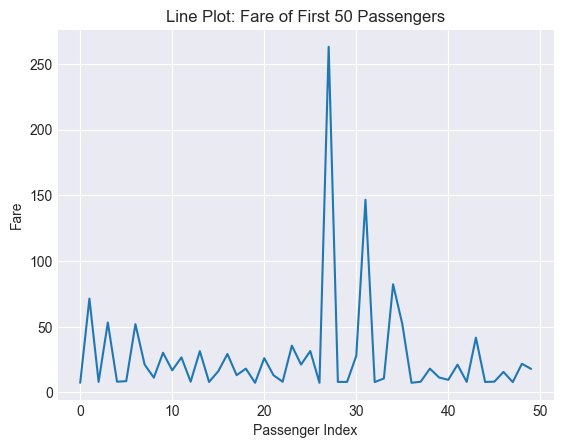

=== Histogram: Age Distribution ===


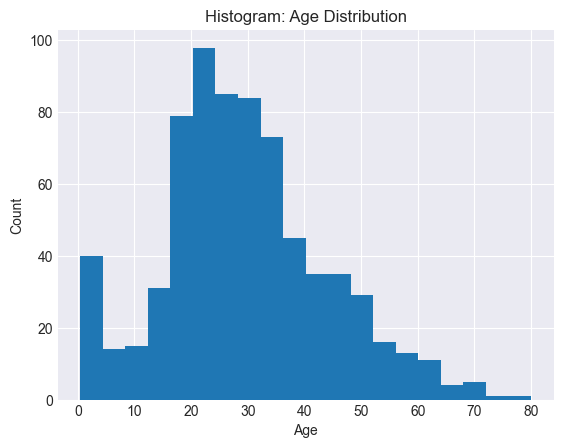

=== Box Plot: Fare by Passenger Class ===


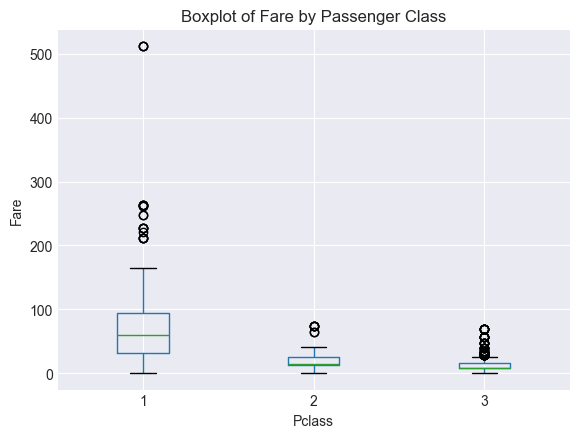

In [157]:
import matplotlib.pyplot as plt

# Set a consistent style
plt.style.use('seaborn-v0_8-darkgrid')

# 1. Line plot: visualize Fare trend across first 50 passengers
print("=== Line Plot: Fare over first 50 passengers ===")
df['Fare'].head(50).plot(title='Line Plot: Fare of First 50 Passengers')
plt.xlabel('Passenger Index')
plt.ylabel('Fare')
plt.show()

# 2. Histogram: distribution of Age
print("=== Histogram: Age Distribution ===")
df['Age'].hist(bins=20)
plt.title('Histogram: Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# 3. Box plot: Fare by Pclass
print("=== Box Plot: Fare by Passenger Class ===")
df.boxplot(column='Fare', by='Pclass')
plt.title('Boxplot of Fare by Passenger Class')
plt.suptitle('')  # Remove default subtitle
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()


# 12. Visualization with Seaborn

Seaborn is a powerful Python visualization library built on top of Matplotlib. It offers high-level interfaces for statistical graphics.

## Correlation Heatmap
We use a heatmap to show pairwise correlations between numerical columns.


=== Correlation Heatmap ===


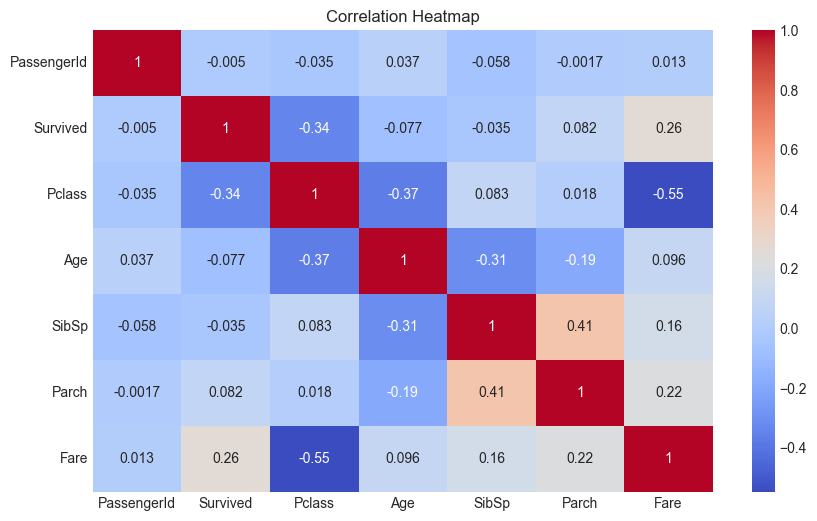

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns to avoid issues
numeric_df = df.select_dtypes(include='number')

# Correlation heatmap
print("=== Correlation Heatmap ===")
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# 13. Pandas vs NumPy

Pandas is built on top of NumPy and offers high-level data manipulation tools specifically designed for tabular data.

## Comparison Table

| Feature              | Pandas                           | NumPy                |
|----------------------|----------------------------------|----------------------|
| **Data Type**        | Tabular (DataFrame, Series)      | N-dimensional Array  |
| **Labels**           | Yes (row and column index)       | No                   |
| **Ease of Use**      | Easier for data analysis         | Lower-level          |
| **Missing Values**   | Handled gracefully (`NaN`, `fillna`) | Not supported directly |
| **Group By / Aggregation** | Yes (`groupby()`, `agg()`) | Must implement manually |
| **File I/O**         | CSV, Excel, JSON supported       | Not built for I/O    |
| **Performance**      | Slightly slower (but flexible)   | Fastest in raw computation |

## Use Pandas when:
- You need labeled rows/columns
- You're doing data wrangling, cleaning, grouping, or exporting
- You work with structured tabular data

## Use NumPy when:
- You need fast numerical computation
- You work with large raw arrays/matrices
- You’re writing mathematical algorithms (e.g. linear algebra)


In [160]:
import pandas as pd
import numpy as np

# === 1. Load the Titanic dataset using Pandas ===
df = pd.read_csv('Titanic-Dataset.csv')  # Make sure this file is in your working directory

# === 2. Pandas DataFrame: Tabular structure with labels ===
print("=== Pandas DataFrame (first 3 rows) ===")
print(df[['Pclass', 'Age', 'Fare']].head(3))

# === 3. NumPy Array: No labels, just numeric array ===
np_array = df[['Age', 'Fare']].to_numpy()
print("\n=== NumPy Array (first 3 rows) ===")
print(np_array[:3])

# === 4. Handle missing values ===
print("\n=== Pandas Mean of Age (handles NaN automatically) ===")
print(df['Age'].mean())

print("\n=== NumPy Mean of Age using np.nanmean (manual handling) ===")
print(np.nanmean(np_array[:, 0]))

# === 5. Grouping and Aggregation ===
print("\n=== Pandas GroupBy: Average Fare by Passenger Class ===")
print(df.groupby('Pclass')['Fare'].mean())

print("\n=== NumPy Manual Aggregation: Average Fare by Pclass ===")
fare_means = []
for cls in [1, 2, 3]:
    fares = df[df['Pclass'] == cls]['Fare'].to_numpy()
    fare_means.append(np.mean(fares))
print("Average fares by class (NumPy):", fare_means)

# === 6. File I/O ===
df[['Name', 'Age']].head(10).to_csv('titanic_output_sample.csv', index=False)
print("\n✅ Data exported to: titanic_output_sample.csv")


=== Pandas DataFrame (first 3 rows) ===
   Pclass   Age     Fare
0       3  22.0   7.2500
1       1  38.0  71.2833
2       3  26.0   7.9250

=== NumPy Array (first 3 rows) ===
[[22.      7.25  ]
 [38.     71.2833]
 [26.      7.925 ]]

=== Pandas Mean of Age (handles NaN automatically) ===
29.69911764705882

=== NumPy Mean of Age using np.nanmean (manual handling) ===
29.69911764705882

=== Pandas GroupBy: Average Fare by Passenger Class ===
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

=== NumPy Manual Aggregation: Average Fare by Pclass ===
Average fares by class (NumPy): [np.float64(84.1546875), np.float64(20.662183152173913), np.float64(13.675550101832993)]

✅ Data exported to: titanic_output_sample.csv


# 14. Use Cases for Pandas

Pandas is one of the most powerful and commonly used libraries in Python for data analysis and manipulation.

## Common Use Cases

- **Financial data analysis**  
  Analyze time-series or tabular data from stock prices or transaction logs.

- **Cleaning data for ML models**  
  Handle missing values, encode categories, and normalize inputs.

- **Data wrangling in web scraping**  
  Structure raw scraped data into clean, structured formats.

- **Exploratory Data Analysis (EDA)**  
  Summarize, visualize, and identify trends or outliers before modeling.


=== Fare Summary ===
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

=== Extracted Last Names ===
                                                Name   LastName
0                            Braund, Mr. Owen Harris     Braund
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    Cumings
2                             Heikkinen, Miss. Laina  Heikkinen
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Futrelle
4                           Allen, Mr. William Henry      Allen


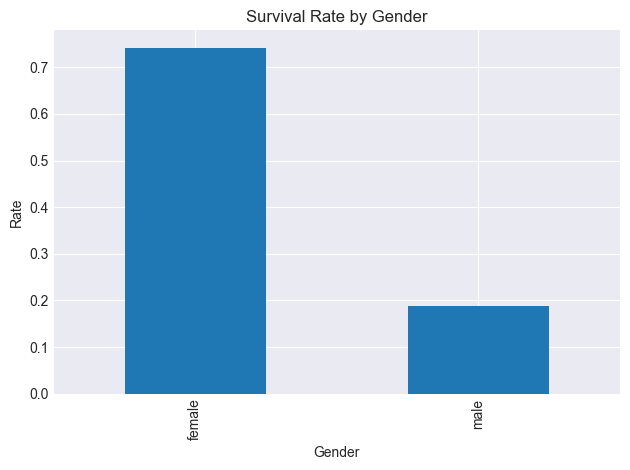

In [161]:
# Load data
df = pd.read_csv('Titanic-Dataset.csv')

# === Financial-style: Summarizing fare distribution (as if fare = transaction amount) ===
print("=== Fare Summary ===")
print(df['Fare'].describe())

# === Cleaning data: Fill missing age values for ML ===
df['Age'] = df['Age'].fillna(df['Age'].median())

# === Web scraping-style wrangling: Assume Name column needs split ===
df['LastName'] = df['Name'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else '')
print("\n=== Extracted Last Names ===")
print(df[['Name', 'LastName']].head())

# === EDA: Visualize survival rate by gender ===
survival_rate = df.groupby('Sex')['Survived'].mean()
survival_rate.plot(kind='bar', title='Survival Rate by Gender', ylabel='Rate', xlabel='Gender')
plt.tight_layout()
plt.show()


# 15. Summary

- **Pandas** is essential for data handling and analysis in Python.
- It provides an intuitive way to **load, transform, clean, and visualize data**.
- Works seamlessly with other libraries like **NumPy**, **Matplotlib**, and **Seaborn**.
- Ideal for exploratory data analysis (EDA), machine learning preprocessing, and real-world data wrangling tasks.
